# Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

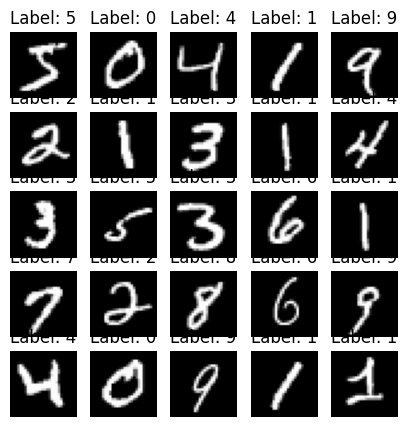

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5, 5))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.show()

# Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [66]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) /255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale', probability=True)
clf.fit(x_train_flat[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flat)

print("Akurasi: ", accuracy_score(y_test, y_pred))

Akurasi:  0.9513


# Praktikum D3 – Membangun CNN Sederhana

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8927 - loss: 0.3581 - val_accuracy: 0.9813 - val_loss: 0.0674
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9805 - loss: 0.0657 - val_accuracy: 0.9852 - val_loss: 0.0554
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0430 - val_accuracy: 0.9855 - val_loss: 0.0520
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9906 - loss: 0.0289 - val_accuracy: 0.9870 - val_loss: 0.0520
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9936 - loss: 0.0210 - val_accuracy: 0.9872 - val_loss: 0.0537


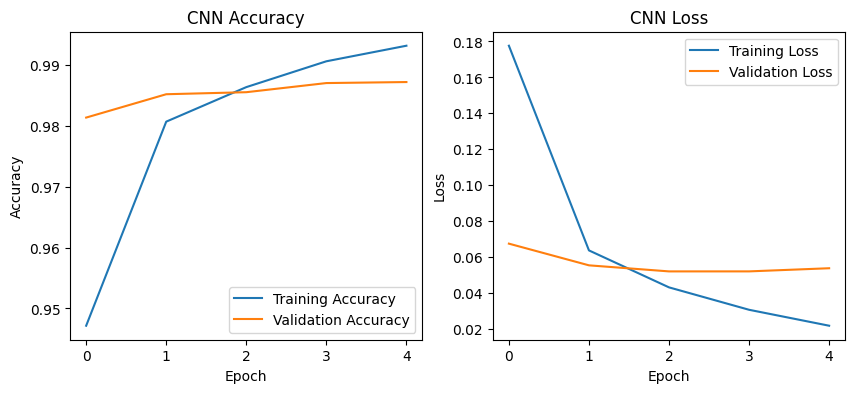

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn,
                    y_train, epochs=5,
                    validation_split=0.1)

# Plot History
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2125 - loss: 2.0654 - val_accuracy: 0.4418 - val_loss: 1.6303
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3166 - loss: 1.7735 - val_accuracy: 0.4872 - val_loss: 1.5319
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3364 - loss: 1.7167 - val_accuracy: 0.5024 - val_loss: 1.4769
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3519 - loss: 1.6759 - val_accuracy: 0.5064 - val_loss: 1.4370
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3594 - loss: 1.6445 - val_accuracy: 0.5164 - val_loss: 1.4204
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3689 - loss: 1.6279 - val_accuracy: 0.5214 - val_loss: 1.3714
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3780 - loss: 1.6048 - val_accuracy: 0.5374 - val_loss: 1.3699
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━

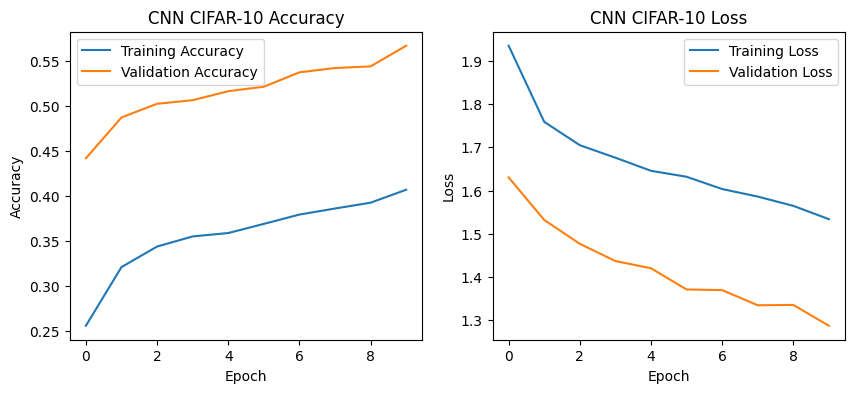

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test, = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Plot History
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.4649 - loss: 1.5376 - val_accuracy: 0.5770 - val_loss: 1.2345
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5838 - loss: 1.2057 - val_accuracy: 0.5958 - val_loss: 1.1590
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6011 - loss: 1.1389 - val_accuracy: 0.5970 - val_loss: 1.1437
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6162 - loss: 1.1026 - val_accuracy: 0.6068 - val_loss: 1.1207
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6291 - loss: 1.0596 - val_accuracy: 0.6018 - val_loss: 1.1378


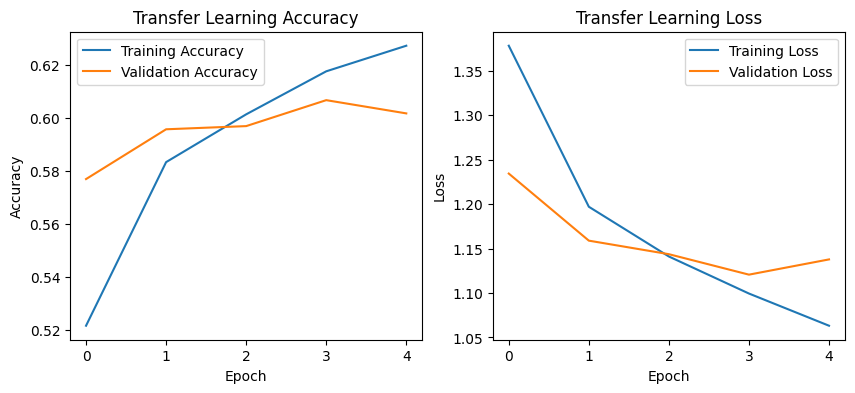

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test, = x_train/255.0, x_test/255.0

model = models.Sequential([ base_model, layers.Flatten(),
layers.Dense(128, activation='relu'), layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Plot History
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Praktikum D5 – Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.5074 - loss: 1.4036 - val_accuracy: 0.6102 - val_loss: 1.0969
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.6286 - loss: 1.0565 - val_accuracy: 0.6408 - val_loss: 1.0284
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6578 - loss: 0.9719 - val_accuracy: 0.6554 - val_loss: 0.9852
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6774 - loss: 0.9227 - val_accuracy: 0.6610 - val_loss: 0.9849
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6879 - loss: 0.8822 - val_accuracy: 0.6736 - val_loss: 0.9595


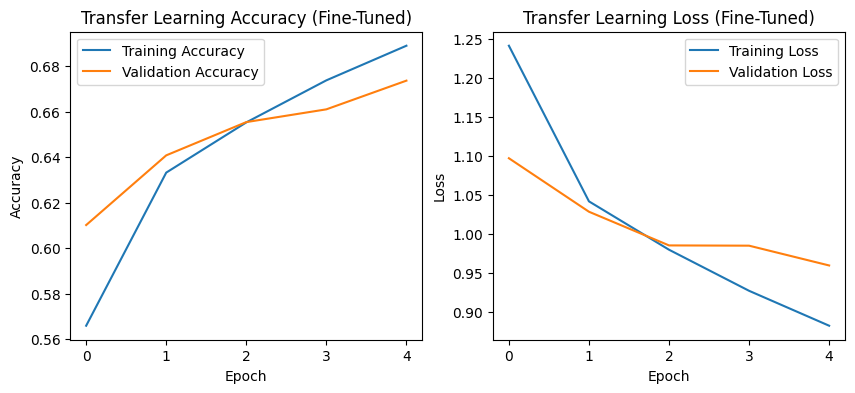

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze all layers initially
base_model.trainable = False

# Unfreeze the last two layers for fine-tuning
for layer in base_model.layers[-2:]:
    layer.trainable = True

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Plot training history
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy (Fine-Tuned)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss (Fine-Tuned)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1000
           1       0.72      0.81      0.76      1000
           2       0.62      0.58      0.60      1000
           3       0.49      0.53      0.51      1000
           4       0.64      0.55      0.59      1000
           5       0.73      0.40      0.52      1000
           6       0.72      0.68      0.70      1000
           7       0.60      0.83      0.70      1000
           8       0.81      0.74      0.77      1000
           9       0.72      0.74      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



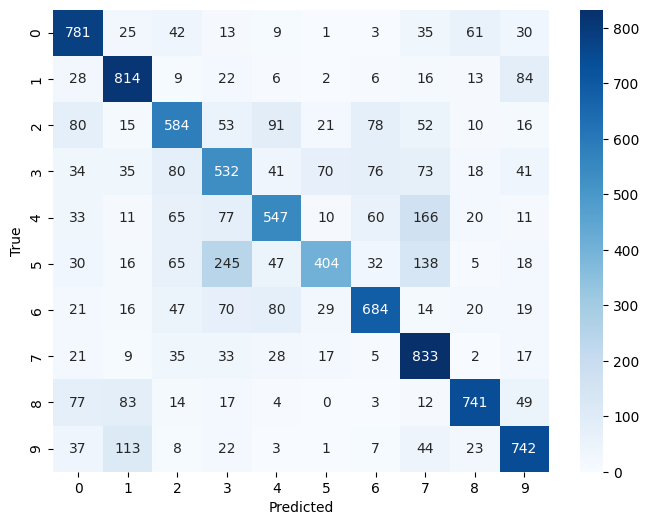

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
predicted_all = cm.sum(axis=1)
predicted_true = np.diag(cm)

predicted_false = predicted_all - predicted_true

for i, pred in enumerate(predicted_false):
  print(f"Class {i} salah diprediksi sebanyak {pred} kali")

Class 0 salah diprediksi sebanyak 219 kali
Class 1 salah diprediksi sebanyak 186 kali
Class 2 salah diprediksi sebanyak 416 kali
Class 3 salah diprediksi sebanyak 468 kali
Class 4 salah diprediksi sebanyak 453 kali
Class 5 salah diprediksi sebanyak 596 kali
Class 6 salah diprediksi sebanyak 316 kali
Class 7 salah diprediksi sebanyak 167 kali
Class 8 salah diprediksi sebanyak 259 kali
Class 9 salah diprediksi sebanyak 258 kali


# **PENUGASAN**

In [75]:
# Upload file foto tulisan angka
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam)
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)


    arr = np.array(img).astype(np.uint8)

    # Invert putih di atas gelap
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = np.expand_dims(arr, axis=-1)

    arr = arr[..., None]
    return canvas, arr


Saving 0_0.jpg to 0_0.jpg
Saving 0_1.jpg to 0_1.jpg
Saving 0_2.jpg to 0_2.jpg
Saving 1_0.jpg to 1_0.jpg
Saving 1_1.jpg to 1_1.jpg
Saving 1_2.jpg to 1_2.jpg
Saving 2_0.jpg to 2_0.jpg
Saving 2_1.jpg to 2_1.jpg
Saving 2_2.jpg to 2_2.jpg
Saving 3_0.jpg to 3_0.jpg
Saving 3_1.jpg to 3_1.jpg
Saving 3_2.jpg to 3_2.jpg
Saving 4_0.jpg to 4_0.jpg
Saving 4_1.jpg to 4_1.jpg
Saving 4_2.jpg to 4_2.jpg
Saving 5_0.jpg to 5_0.jpg
Saving 5_1.jpg to 5_1.jpg
Saving 5_2.jpg to 5_2.jpg
Saving 6_0.jpg to 6_0.jpg
Saving 6_1.jpg to 6_1.jpg
Saving 6_2.jpg to 6_2.jpg
Saving 7_0.jpg to 7_0.jpg
Saving 7_1.jpg to 7_1.jpg
Saving 7_2.jpg to 7_2.jpg
Saving 8_0.jpg to 8_0.jpg
Saving 8_1.jpg to 8_1.jpg
Saving 8_2.jpg to 8_2.jpg
Saving 9_0.jpg to 9_0.jpg
Saving 9_1.jpg to 9_1.jpg
Saving 9_2.jpg to 9_2.jpg


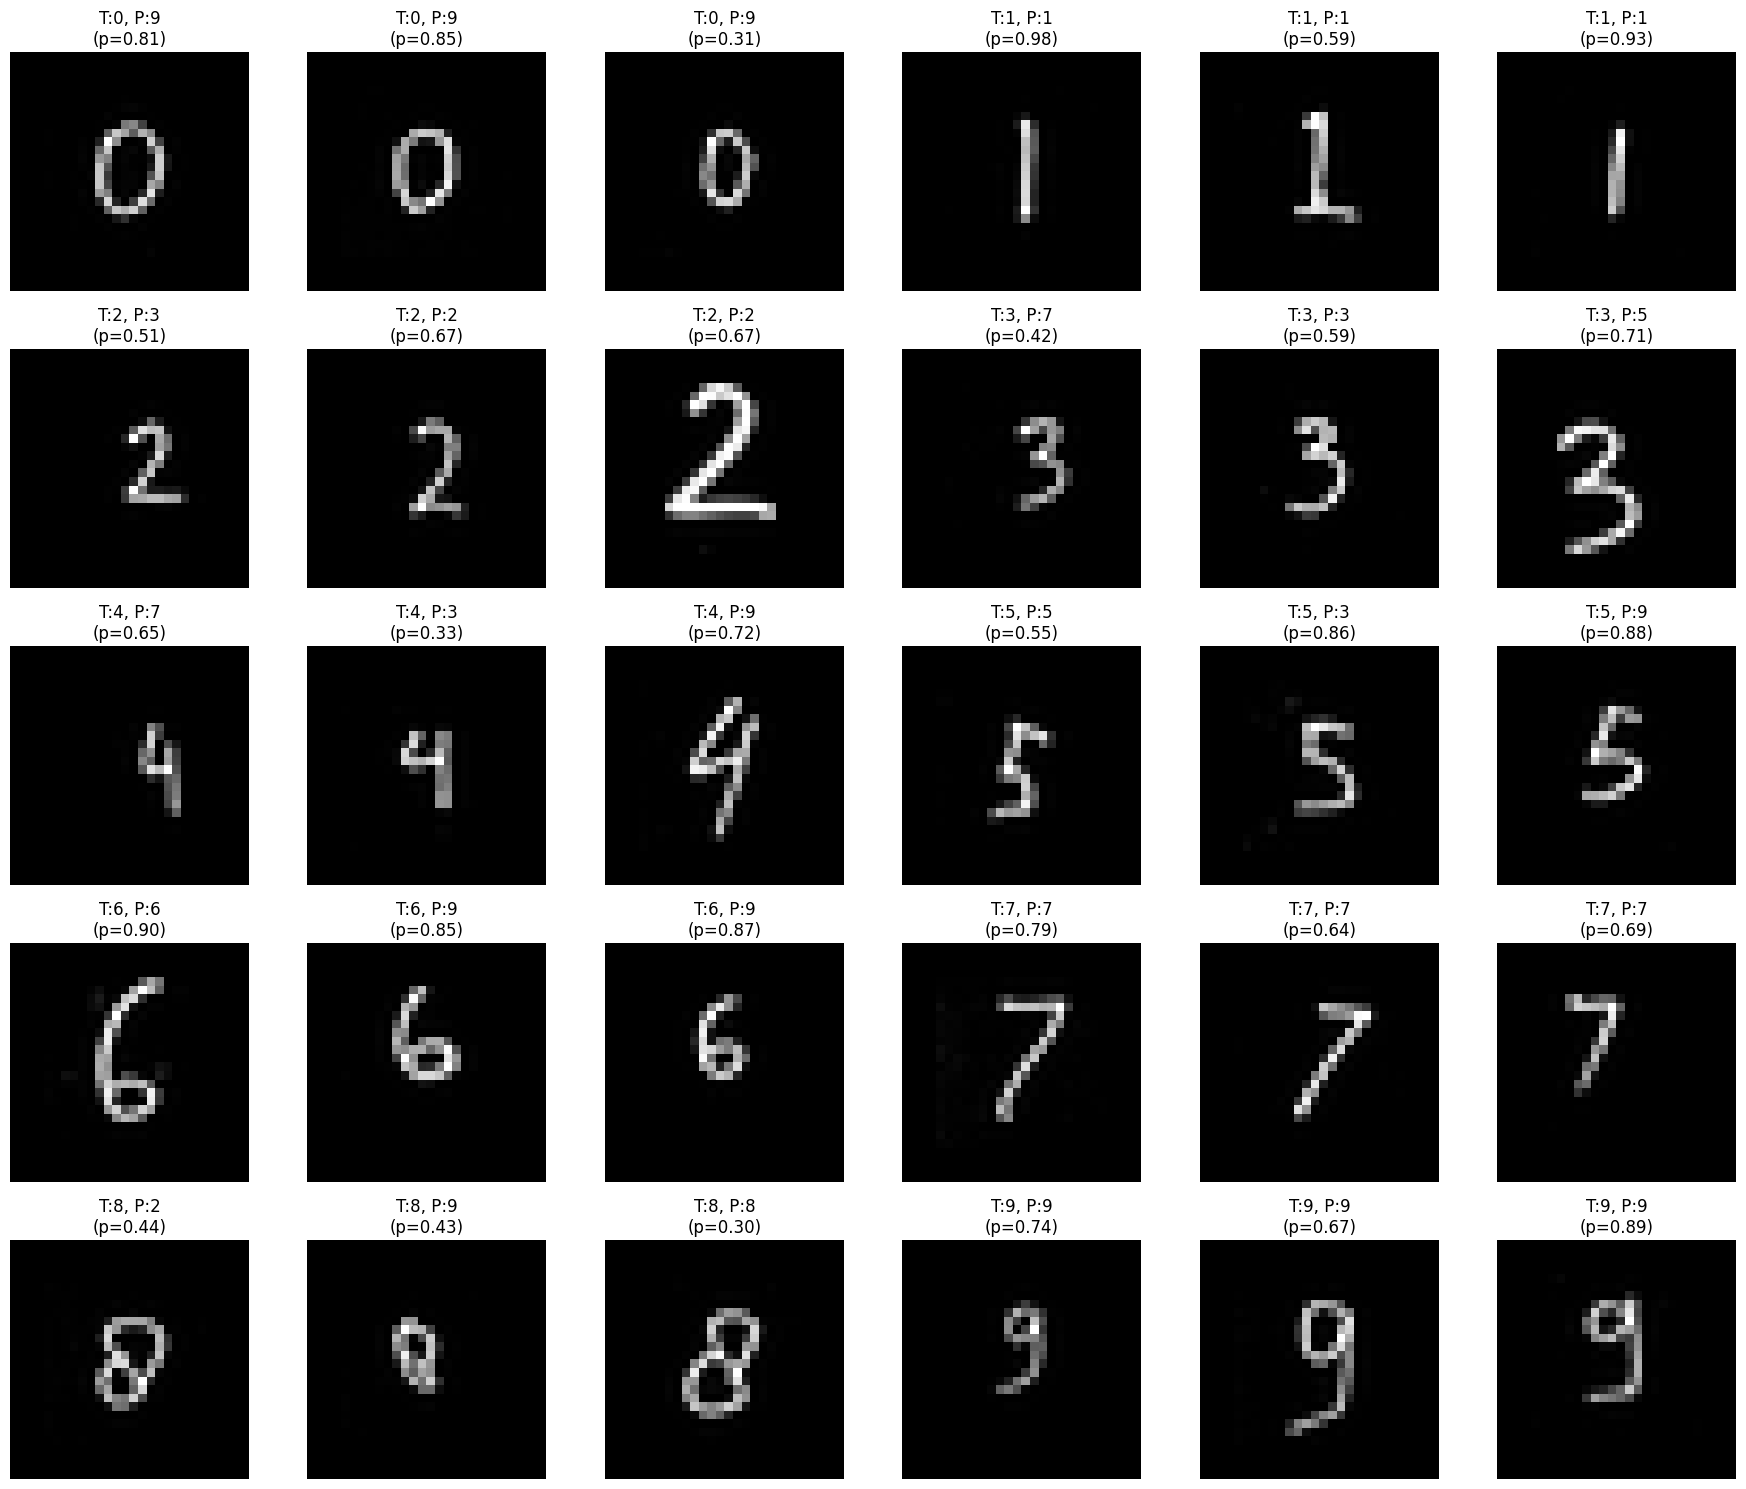

Rekap Prediksi (CNN):
- 0_0.jpg -> Pred: 9 (p=0.815), True: 0
- 0_1.jpg -> Pred: 9 (p=0.853), True: 0
- 0_2.jpg -> Pred: 9 (p=0.306), True: 0
- 1_0.jpg -> Pred: 1 (p=0.982), True: 1
- 1_1.jpg -> Pred: 1 (p=0.590), True: 1
- 1_2.jpg -> Pred: 1 (p=0.927), True: 1
- 2_0.jpg -> Pred: 3 (p=0.507), True: 2
- 2_1.jpg -> Pred: 2 (p=0.670), True: 2
- 2_2.jpg -> Pred: 2 (p=0.670), True: 2
- 3_0.jpg -> Pred: 7 (p=0.422), True: 3
- 3_1.jpg -> Pred: 3 (p=0.585), True: 3
- 3_2.jpg -> Pred: 5 (p=0.710), True: 3
- 4_0.jpg -> Pred: 7 (p=0.652), True: 4
- 4_1.jpg -> Pred: 3 (p=0.331), True: 4
- 4_2.jpg -> Pred: 9 (p=0.718), True: 4
- 5_0.jpg -> Pred: 5 (p=0.553), True: 5
- 5_1.jpg -> Pred: 3 (p=0.865), True: 5
- 5_2.jpg -> Pred: 9 (p=0.875), True: 5
- 6_0.jpg -> Pred: 6 (p=0.901), True: 6
- 6_1.jpg -> Pred: 9 (p=0.855), True: 6
- 6_2.jpg -> Pred: 9 (p=0.868), True: 6
- 7_0.jpg -> Pred: 7 (p=0.793), True: 7
- 7_1.jpg -> Pred: 7 (p=0.639), True: 7
- 7_2.jpg -> Pred: 7 (p=0.689), True: 7
- 8_0.jpg -> Pred:

In [76]:
import matplotlib.pyplot as plt

results = []

# Simpan gambar dan info prediksi
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)

    x_batch = np.expand_dims(x, axis=0)

    # Prediksi
    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    # Ambil label dari nama file nama filenya misal 0_1, 0_2, 0_3
    true_label = int(fname.split("_")[0])

    results.append((fname, pred, conf, disp, true_label))

# Tampilkan hasil berjajar 6 kolom
n = len(results)
cols = 6
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))

for i, (fname, pred, conf, disp, true_label) in enumerate(results):
    ax = axes.flat[i]
    ax.imshow(disp, cmap='gray')
    ax.set_title(f"T:{true_label}, P:{pred}\n(p={conf:.2f})")
    ax.axis('off')

for j in range(i+1, rows*cols):
    axes.flat[j].axis('off')

plt.tight_layout()
plt.show()

# Rekap
print("Rekap Prediksi (CNN):")
correct = 0
for r in results:
    fname, pred, conf, disp, true_label = r
    print(f"- {fname} -> Pred: {pred} (p={conf:.3f}), True: {true_label}")
    if pred == true_label:
        correct += 1

# Akurasi prediksi yang benar
acc = correct / len(results) if results else 0
print(f"\nAkurasi: {correct}/{len(results)} = {acc:.2%}")


In [77]:
from sklearn.metrics import accuracy_score

results = []
y_true, y_pred = [], []

for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_to_mnist_28x28(img_pil)   # x: (28,28,1) float [0,1]

    # Flatten ke 784
    x_flat = x.reshape(1, -1)

    # Prediksi
    pred = int(clf.predict(x_flat)[0])

    # Ambil label dari nama file (misal "2_10.png" -> 2)
    true_label = int(fname.split("_")[0])

    # Confidence (jika SVC dilatih dengan probability=True)
    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass

    results.append((fname, pred, conf, true_label))
    y_true.append(true_label)
    y_pred.append(pred)

    # Print per file
    if conf is not None:
        print(f"{fname} -> Prediksi SVM: {pred}, True: {true_label} (p≈{conf:.2f})")
    else:
        print(f"{fname} -> Prediksi SVM: {pred}, True: {true_label}")

# Hitung akurasi total
acc = accuracy_score(y_true, y_pred) if y_true else 0
print(f"\nAkurasi SVM: {acc:.2%} ({sum(np.array(y_true)==np.array(y_pred))}/{len(y_true)})")


0_0.jpg -> Prediksi SVM: 4, True: 0 (p≈0.77)
0_1.jpg -> Prediksi SVM: 4, True: 0 (p≈0.89)
0_2.jpg -> Prediksi SVM: 4, True: 0 (p≈0.70)
1_0.jpg -> Prediksi SVM: 1, True: 1 (p≈0.93)
1_1.jpg -> Prediksi SVM: 1, True: 1 (p≈0.78)
1_2.jpg -> Prediksi SVM: 1, True: 1 (p≈0.90)
2_0.jpg -> Prediksi SVM: 7, True: 2 (p≈0.54)
2_1.jpg -> Prediksi SVM: 1, True: 2 (p≈0.38)
2_2.jpg -> Prediksi SVM: 2, True: 2 (p≈0.91)
3_0.jpg -> Prediksi SVM: 7, True: 3 (p≈0.77)
3_1.jpg -> Prediksi SVM: 1, True: 3 (p≈0.40)
3_2.jpg -> Prediksi SVM: 5, True: 3 (p≈0.60)
4_0.jpg -> Prediksi SVM: 4, True: 4 (p≈0.38)
4_1.jpg -> Prediksi SVM: 4, True: 4 (p≈0.50)
4_2.jpg -> Prediksi SVM: 4, True: 4 (p≈0.37)
5_0.jpg -> Prediksi SVM: 1, True: 5 (p≈0.68)
5_1.jpg -> Prediksi SVM: 1, True: 5 (p≈0.28)
5_2.jpg -> Prediksi SVM: 4, True: 5 (p≈0.37)
6_0.jpg -> Prediksi SVM: 6, True: 6 (p≈0.55)
6_1.jpg -> Prediksi SVM: 4, True: 6 (p≈0.80)
6_2.jpg -> Prediksi SVM: 1, True: 6 (p≈0.27)
7_0.jpg -> Prediksi SVM: 1, True: 7 (p≈0.42)
7_1.jpg ->